<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/Learning_rate_scheduling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 17th Jan, 2023

# Learning rate Scheduling
1. Why Learning rate is important?<br>
> 1. First see animated graphs in [this link](https://iconof.com/1cycle-learning-rate-policy/) for why learning rate scheduing is important<br>

2. Schedulers: <br>
> a. See full article with graphs and results [here](https://d2l.ai/chapter_optimization/lr-scheduler.html)<br>
> b. Hands On Machine Learning book, See page 352

3. fit_one_cycle
>a. See this [link](https://iconof.com/1cycle-learning-rate-policy/) again (a little down the page)<br>
>b. See this good [blog](https://sgugger.github.io/the-1cycle-policy.html) by Sylvain Gugger

4. See the code below as to how to use learning rate scheduler as an optimizer
 



### About the notebook
This notebook is just to explain Learning rate Scheduling. Do not run the code

2. See graphs in [this link](https://iconof.com/1cycle-learning-rate-policy/) for why learning rate scheduing is important



### Effects of Learning rate on convergence
Four cases. Click in `Case 1` etc hyperlinks to see animation. 

[Case 1:](https://iconof.com/81d04746df552258b87b24e2e3da17a5/lr_low.gif)

>Too small LR (0.01). The model fails to converge within 100 epochs. More epochs—and time—required:

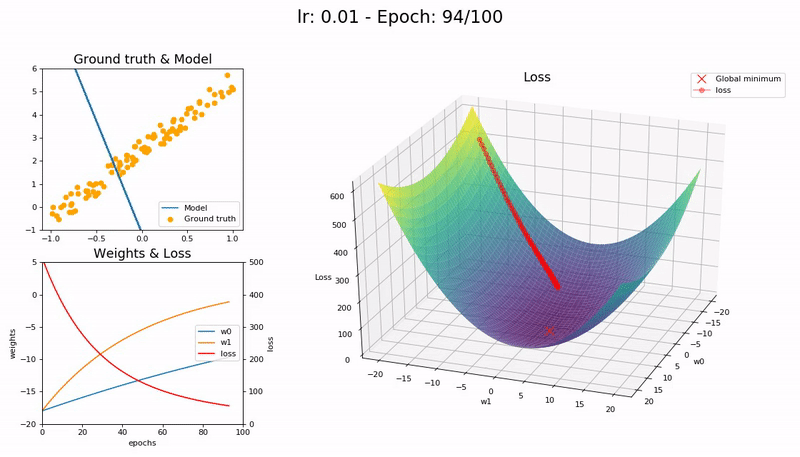

[Case 2:](https://iconof.com/bcbb05eb43406655478d10ec5389aae2/lr_good.gif)<br>
>Good LR (0.1). The model converges successfully within 100 epochs: 

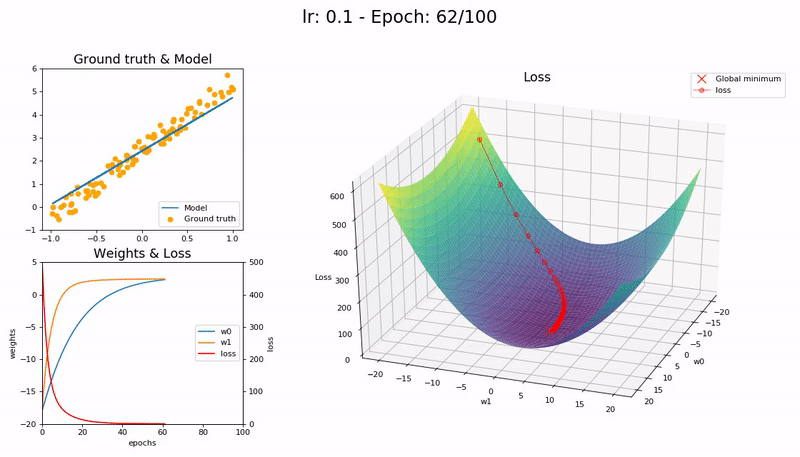

[Case 3:](https://iconof.com/746b4b683f425909fe557ed0df108424/lr_optimal.gif)<br>
>Optimal LR (0.7). The model converges successfully, very quickly, in under 10 epochs: 

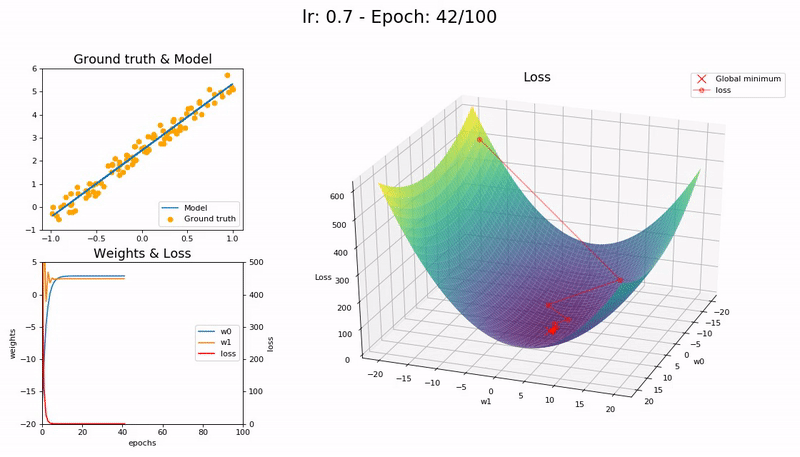

[Case 4:](https://iconof.com/66286fcbf9e01fdecbd701e3203f2a3b/lr_large.gif)<br>
>Large LR (0.99). The model fails to converge as the loss function fluctuates around the minimum: 

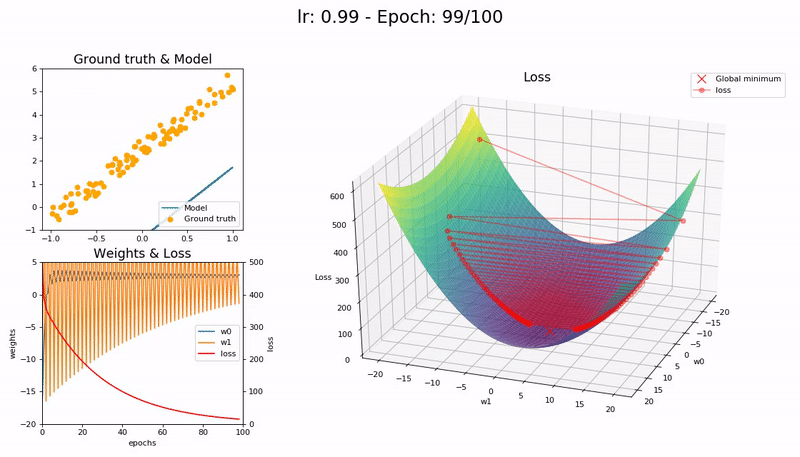

## From the book: Hands On Machine Learning (page 353)

<b>Power scheduling</b>:<br>
> Set the learning rate to a function of the iteration number t: η(t) = η0 / (1 + t/k)^c. The initial learning rate η0, the power c (typically set to 1). <br>

**Step-wise scheduling**:<br>
> Or, Let s be a hyperparameter. The learning rate drops at each step, and after s steps it is down to η0 / 2. After s more steps, it is down to η0 / 3. Then down to η0 / 4, then η0 / 5, and so on. As you can see, this schedule first drops quickly, then more and more slowly. Of course, this requires tuning η0, s (and possibly c). <br>

**Exponential scheduling**:<br>
> Set the learning rate to: η(t) = η0 (0.1)*t/s. The learning rate will gradually drop by a factor of 10 every s steps. While power scheduling reduces the learning rate more and more slowly, exponential scheduling keeps slashing it by a factor of 10 every s steps. <br>

**Piecewise constant scheduling**: <br>
>Use a constant learning rate for a number of epochs (e.g., η0 = 0.1 for 5 epochs), then a smaller learning rate for another number of epochs (e.g., η1 = 0.001 for 50 epochs), and so on. Although this solution can work very well, it requires fiddling around to figure out the right sequence of learning rates, and how long to use each of them. <br>


## Demonstrating how to use Learning rate schedulers
Tensorflow, keras has a number of `lr schedulers`. For a full list of schedulers see this [link](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules).<br>
For the code below, refer [here](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler)

In [ ]:
# 0.0
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# 1.0 Call libraries
import tensorflow as tf
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np

A number of inbuilt learning rate schedulers are available. See this [link](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules) for a list of schedulers.<br> We will write a custom scheduler.

In [ ]:
# 1.1 This function keeps the initial learning rate for 
#       the first ten epochs and decreases it exponentially 
#        after that.


def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [ ]:
# 1.1.1 Another custom scheduler:

class SquareRootScheduler:
    def __init__(self, lr=0.1):
        self.lr = lr

    def __call__(self, num_update):
        return self.lr * pow(num_update + 1.0, -0.5)

In [ ]:
# 1.2 Our data and target:

data, target = np.arange(100).reshape(5, 20), np.zeros(5)
data
print("\n=========\n")
target

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
        56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
        76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
        96, 97, 98, 99]])

array([0., 0., 0., 0., 0.])

In [ ]:
# 2.0 Our model:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape = (20,)),
                                    tf.keras.layers.Dense(10),
                                    tf.keras.layers.Dense(1)
                                    ])

For `tf.keras.optimizers.SGD()`, see this [link](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/SGD)

In [ ]:
# 2.1 Model compilation:

model.compile(
               tf.keras.optimizers.SGD(),   # Try also 'learning_rate = 0.7'
                                            # Default is 0.01
               loss='mse'
               )

In [ ]:
# 2.1.1 What is the learning rate at this point of time 
model.optimizer.learning_rate
print("\n=========\n")
model.optimizer.learning_rate.numpy()


<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.01>

0.01

In [ ]:
# 2.2 Define a callback function to schedule learning rate
# as per scheduler:

callback = tf.keras.callbacks.LearningRateScheduler(
                                                     scheduler
                                                    )

In [ ]:
# 3.0 Train the model
history = model.fit(data,
                    target,
                    epochs=15,
                    callbacks=[callback],
                    verbose=0
                    )


In [ ]:
# 3.1 What is the learning rate at this point of time 
#      that is after training:

model.optimizer.learning_rate
print("\n=========\n")
model.optimizer.learning_rate.numpy()


<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.006065305>

0.006065305

In [ ]:
################### Done ##################

## Other schedulers

While we cannot possibly cover the entire variety of learning rate schedulers, we attempt to give a brief overview of popular policies below. Common choices are polynomial decay and piecewise constant schedules. Beyond that, cosine learning rate schedules have been found to work well empirically on some problems. Lastly, on some problems it is beneficial to warm up the optimizer prior to using large learning rates.

### Factor Scheduler

One alternative to a polynomial decay would be a multiplicative one, that is $\eta_{t+1} \leftarrow \eta_t \cdot \alpha$ for $\alpha \in (0, 1)$. To prevent the learning rate from decaying beyond a reasonable lower bound the update equation is often modified to $\eta_{t+1} \leftarrow \mathop{\mathrm{max}}(\eta_{\mathrm{min}}, \eta_t \cdot \alpha)$.


While we cannot possibly cover the entire variety of learning rate schedulers, we attempt to give a brief overview of popular policies below. Common choices are polynomial decay and piecewise constant schedules. Beyond that, cosine learning rate schedules have been found to work well empirically on some problems. Lastly, on some problems it is beneficial to warm up the optimizer prior to using large learning rates.

### A. Factor Scheduler

One alternative to a polynomial decay would be a multiplicative one, that is $\eta_{t+1} \leftarrow \eta_t \cdot \alpha$ for $\alpha \in (0, 1)$. To prevent the learning rate from decaying beyond a reasonable lower bound the update equation is often modified to $\eta_{t+1} \leftarrow \mathop{\mathrm{max}}(\eta_{\mathrm{min}}, \eta_t \cdot \alpha)$.

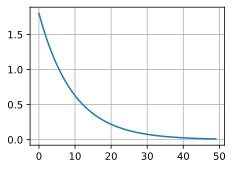

In [ ]:
class FactorScheduler:
    def __init__(self, factor=1, stop_factor_lr=1e-7, base_lr=0.1):
        self.factor = factor
        self.stop_factor_lr = stop_factor_lr
        self.base_lr = base_lr

    def __call__(self, num_update):
        self.base_lr = max(self.stop_factor_lr, self.base_lr * self.factor)
        return self.base_lr

scheduler = FactorScheduler(factor=0.9, stop_factor_lr=1e-2, base_lr=2.0)
d2l.plot(torch.arange(50), [scheduler(t) for t in range(50)])

This can also be accomplished by a built-in scheduler in MXNet via the `lr_scheduler.FactorScheduler` object. It takes a few more parameters, such as warmup period, warmup mode (linear or constant), the maximum number of desired updates, etc.; Going forward we will use the built-in schedulers as appropriate and only explain their functionality here. As illustrated, it is fairly straightforward to build your own scheduler if needed.

### B. Multi Factor Scheduler

A common strategy for training deep networks is to keep the learning rate piecewise constant and to decrease it by a given amount every so often. That is, given a set of times when to decrease the rate, such as $s = \{5, 10, 20\}$ decrease $\eta_{t+1} \leftarrow \eta_t \cdot \alpha$ whenever $t \in s$. Assuming that the values are halved at each step we can implement this as follows.


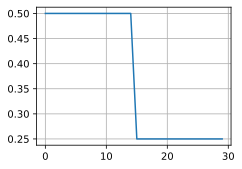

In [ ]:
net = net_fn()
trainer = torch.optim.SGD(net.parameters(), lr=0.5)
scheduler = lr_scheduler.MultiStepLR(trainer, milestones=[15, 30], gamma=0.5)

def get_lr(trainer, scheduler):
    lr = scheduler.get_last_lr()[0]
    trainer.step()
    scheduler.step()
    return lr

d2l.plot(torch.arange(num_epochs), [get_lr(trainer, scheduler)
                                  for t in range(num_epochs)])

The intuition behind this piecewise constant learning rate schedule is that one lets optimization proceed until a stationary point has been reached in terms of the distribution of weight vectors. Then (and only then) do we decrease the rate such as to obtain a higher quality proxy to a good local minimum. The example below shows how this can produce ever slightly better solutions.


train loss 0.210, train acc 0.920, test acc 0.870


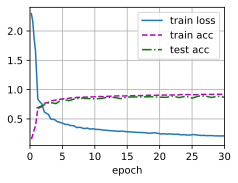

In [ ]:
train(net, train_iter, test_iter, num_epochs, loss, trainer, device,
      scheduler)

### Cosine Scheduler

A rather perplexing heuristic was proposed by :citet:`Loshchilov.Hutter.2016`. It relies on the observation that we might not want to decrease the learning rate too drastically in the beginning and moreover, that we might want to "refine" the solution in the end using a very small learning rate. This results in a cosine-like schedule with the following functional form for learning rates in the range $t \in [0, T]$.

$$\eta_t = \eta_T + \frac{\eta_0 - \eta_T}{2} \left(1 + \cos(\pi t/T)\right)$$


Here $\eta_0$ is the initial learning rate, $\eta_T$ is the target rate at time $T$. Furthermore, for $t > T$ we simply pin the value to $\eta_T$ without increasing it again. In the following example, we set the max update step $T = 20$.


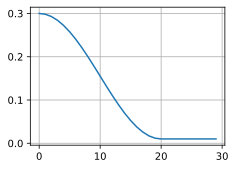

In [ ]:
class CosineScheduler:
    def __init__(self, max_update, base_lr=0.01, final_lr=0,
               warmup_steps=0, warmup_begin_lr=0):
        self.base_lr_orig = base_lr
        self.max_update = max_update
        self.final_lr = final_lr
        self.warmup_steps = warmup_steps
        self.warmup_begin_lr = warmup_begin_lr
        self.max_steps = self.max_update - self.warmup_steps

    def get_warmup_lr(self, epoch):
        increase = (self.base_lr_orig - self.warmup_begin_lr) \
                       * float(epoch) / float(self.warmup_steps)
        return self.warmup_begin_lr + increase

    def __call__(self, epoch):
        if epoch < self.warmup_steps:
            return self.get_warmup_lr(epoch)
        if epoch <= self.max_update:
            self.base_lr = self.final_lr + (
                self.base_lr_orig - self.final_lr) * (1 + math.cos(
                math.pi * (epoch - self.warmup_steps) / self.max_steps)) / 2
        return self.base_lr

scheduler = CosineScheduler(max_update=20, base_lr=0.3, final_lr=0.01)
d2l.plot(torch.arange(num_epochs), [scheduler(t) for t in range(num_epochs)])

In the context of computer vision this schedule *can* lead to improved results. Note, though, that such improvements are not guaranteed (as can be seen below).


train loss 0.198, train acc 0.926, test acc 0.897


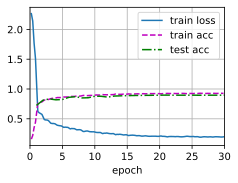

In [ ]:
net = net_fn()
trainer = torch.optim.SGD(net.parameters(), lr=0.3)
train(net, train_iter, test_iter, num_epochs, loss, trainer, device,
      scheduler)

### Warmup

In some cases initializing the parameters is not sufficient to guarantee a good solution. This is particularly a problem for some advanced network designs that may lead to unstable optimization problems. We could address this by choosing a sufficiently small learning rate to prevent divergence in the beginning. Unfortunately this means that progress is slow. Conversely, a large learning rate initially leads to divergence.

A rather simple fix for this dilemma is to use a warmup period during which the learning rate *increases* to its initial maximum and to cool down the rate until the end of the optimization process. For simplicity one typically uses a linear increase for this purpose. This leads to a schedule of the form indicated below.


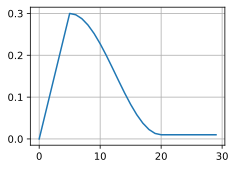

In [ ]:
scheduler = CosineScheduler(20, warmup_steps=5, base_lr=0.3, final_lr=0.01)
d2l.plot(torch.arange(num_epochs), [scheduler(t) for t in range(num_epochs)])

Note that the network converges better initially (in particular observe the performance during the first 5 epochs).


train loss 0.229, train acc 0.917, test acc 0.893


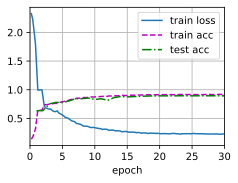

In [ ]:
net = net_fn()
trainer = torch.optim.SGD(net.parameters(), lr=0.3)
train(net, train_iter, test_iter, num_epochs, loss, trainer, device,
      scheduler)

Warmup can be applied to any scheduler (not just cosine). For a more detailed discussion of learning rate schedules and many more experiments see also :cite:`Gotmare.Keskar.Xiong.ea.2018`. In particular they find that a warmup phase limits the amount of divergence of parameters in very deep networks. This makes intuitively sense since we would expect significant divergence due to random initialization in those parts of the network that take the most time to make progress in the beginning.

## Summary

* Decreasing the learning rate during training can lead to improved accuracy and (most perplexingly) reduced overfitting of the model.
* A piecewise decrease of the learning rate whenever progress has plateaued is effective in practice. Essentially this ensures that we converge efficiently to a suitable solution and only then reduce the inherent variance of the parameters by reducing the learning rate.
* Cosine schedulers are popular for some computer vision problems. See e.g., [GluonCV](http://gluon-cv.mxnet.io) for details of such a scheduler.
* A warmup period before optimization can prevent divergence.
* Optimization serves multiple purposes in deep learning. Besides minimizing the training objective, different choices of optimization algorithms and learning rate scheduling can lead to rather different amounts of generalization and overfitting on the test set (for the same amount of training error).



## From the book: Hands On Machine Learning (page 353)

<b>Power scheduling</b>:<br>
> Set the learning rate to a function of the iteration number t: η(t) = η0 / (1 + t/k)^c. The initial learning rate η0, the power c (typically set to 1). <br>

**Step-wise scheduling**:<br>
> Or, Let s be a hyperparameter. The learning rate drops at each step, and after s steps it is down to η0 / 2. After s more steps, it is down to η0 / 3. Then down to η0 / 4, then η0 / 5, and so on. As you can see, this schedule first drops quickly, then more and more slowly. Of course, this requires tuning η0, s (and possibly c). <br>

**Exponential scheduling**:<br>
> Set the learning rate to: η(t) = η0 (0.1)*t/s. The learning rate will gradually drop by a factor of 10 every s steps. While power scheduling reduces the learning rate more and more slowly, exponential scheduling keeps slashing it by a factor of 10 every s steps. <br>

**Piecewise constant scheduling**: <br>
>Use a constant learning rate for a number of epochs (e.g., η0 = 0.1 for 5 epochs), then a smaller learning rate for another number of epochs (e.g., η1 = 0.001 for 50 epochs), and so on. Although this solution can work very well, it requires fiddling around to figure out the right sequence of learning rates, and how long to use each of them. <br>


## Demonstrating how to use Learning rate schedulers
Reference [here](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler)

In [ ]:
# 0.0
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# 1.0 Call libraries
import tensorflow as tf
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np

A number of inbuilt learning rate schedulers are available. See this [link](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules) for a list of schedulers.<br> We will write a custom scheduler.

In [ ]:
# 1.1 This function keeps the initial learning rate for 
#       the first ten epochs and decreases it exponentially 
#        after that.


def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [ ]:
# 1.1.1 Another custom scheduler:

class SquareRootScheduler:
    def __init__(self, lr=0.1):
        self.lr = lr

    def __call__(self, num_update):
        return self.lr * pow(num_update + 1.0, -0.5)

In [ ]:
# 1.2 Our data and target:

data, target = np.arange(100).reshape(5, 20), np.zeros(5)
data
print("\n=========\n")
target

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
        56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
        76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
        96, 97, 98, 99]])

array([0., 0., 0., 0., 0.])

In [ ]:
# 2.0 Our model:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape = (20,)),
                                    tf.keras.layers.Dense(10),
                                    tf.keras.layers.Dense(1)
                                    ])

For `tf.keras.optimizers.SGD()`, see this [link](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/SGD)

In [ ]:
# 2.1 Model compilation:

model.compile(
               tf.keras.optimizers.SGD(),   # Try also 'learning_rate = 0.7'
                                            # Default is 0.01
               loss='mse'
               )

In [ ]:
# 2.1.1 What is the learning rate at this point of time 
model.optimizer.learning_rate
print("\n=========\n")
model.optimizer.learning_rate.numpy()


<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.01>

0.01

In [ ]:
# 2.2 Define a callback function to schedule learning rate
# as per scheduler:

callback = tf.keras.callbacks.LearningRateScheduler(
                                                     scheduler
                                                    )

In [ ]:
# 3.0 Train the model
history = model.fit(data,
                    target,
                    epochs=15,
                    callbacks=[callback],
                    verbose=0
                    )


In [ ]:
# 3.1 What is the learning rate at this point of time 
#      that is after training:

model.optimizer.learning_rate
print("\n=========\n")
model.optimizer.learning_rate.numpy()


<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.006065305>

0.006065305

In [ ]:
################### Done ##################